# Data Sciencie CoderHouse - Comisión: 61750

### Alumno: Fuchs Herrera, Lorenzo

### Introducción

La diabetes es una de las enfermedades crónicas más prevalentes y de mayor impacto en la salud pública a nivel mundial. Según la Organización Mundial de la Salud (OMS), el número de personas con diabetes ha ido aumentando significativamente en las últimas décadas debido al envejecimiento de la población, los estilos de vida sedentarios y los malos hábitos alimenticios.

La diabetes puede clasificarse principalmente en dos tipos: diabetes tipo 1, una enfermedad autoinmune que destruye las células productoras de insulina; y diabetes tipo 2, relacionada con factores como la obesidad y el estilo de vida. Es por esto que lña detección temprana y la clasificación de individuos en riesgo es clave para diseñar intervenciones preventivas y reducir las complicaciones asociadas con la enfermedad.

En este contexto, los modelos de aprendizaje automático (Machine Learning) ofrecen herramientas potentes para la clasificación y predicción, permitiendo analizar grandes volúmenes de datos y detectar patrones complejos que no son evidentes a simple vista.


### Descripción del Problema

En este trabajo, se analizará un [dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data) que contiene información de salud relacionada con factores de riesgo para la diabetes. Las variables incluyen datos como presión arterial alta, colesterol alto, índice de masa corporal (BMI), hábitos de estilo de vida (actividad física, consumo de frutas y verduras, tabaquismo), variables demográficas (edad, género, educación e ingresos) y condiciones preexistentes como enfermedades cardíacas o ataques.

### Objetivo

El objetivo principal de este estudio es desarrollar un clasificador basado en Machine Learning que permita predecir el riesgo de sufrir diabetes de un individuo utilizando las variables proporcionadas en el dataset.

Por tanto la variable objetivo será

Diabetes_012:

- 0: No diabetes

- 1: Prediabetes

- 2: Diabetes

[Data Description](https://docs.google.com/document/d/1HjRQVKGVoSnpBXQ_UG2nqgD5-y320KuIY4fnn_ZVDGQ/edit?usp=sharing)

### Importación de librerias y Carga de datos

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import seaborn as sns
from scipy.stats import skew
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from datetime import datetime
from sklearn import tree
import xgboost as xgb

In [170]:
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [171]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
df = pd.read_csv("/content/drive/MyDrive/Coderhouse/Data Science I/PROYECTO FINAL/Diabetes_012_health_indicators_BRFSS2015.csv")

#### Exploración de datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [174]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


##### 1. **Cantidad de registros**

El dataset tiene un total de 22 campos y de 253680 registros.

##### 2. **Tipo de dato**

Los datos son todos de tipo float64


##### 3. **Variables relevantes**

En este caso estamos tratando con una variable relacionada a la salud, por lo cual teniendo en cuenta conocimientos previos relacionados a esto se sabe que algunas de las variables que tienen una alta relación con la diabetes y algunas que se relacionan entre si

- Edad - Enfermead coronaria
- Fumador - Enfermedad coronaria
- Dieta - Consumo de vegetales y frutas - Ingresos - Educación

Entre otras

##### 4. **Conclusiones preliminares**

- Debido a que no hay valores nulos, se puede proceder directamente con el análisis exploratorio y la preparación de los datos


In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


##### Generalidades

Es interesante recordar que los valores de las variables estan discretizadas en rangos, según lo explicado en [Data Description](https://docs.google.com/document/d/1HjRQVKGVoSnpBXQ_UG2nqgD5-y320KuIY4fnn_ZVDGQ/edit?usp=sharing). La única variables que no esta discretizada en rangos en el indice de masa corporal, justamente en esta variable podemos ver que hay un desviación estandar bastante elevada, esto puede indicar que hay posibles outliers. A simple vista nos indica que hay un indice de masa corporal de 98 lo cual es practicamente imposible, habrá que realizar un manejo correcto de estos valores.

El resto de los datos esta dentro del rango esperable mencionado en la documentación.

Al tener tanta cantidad de datos es interesante determinar si existe un desequilibrio en las clases (0 = No diabetes, 1 = Prediabetes, 2 = Diabetes), en la variable objetivo.

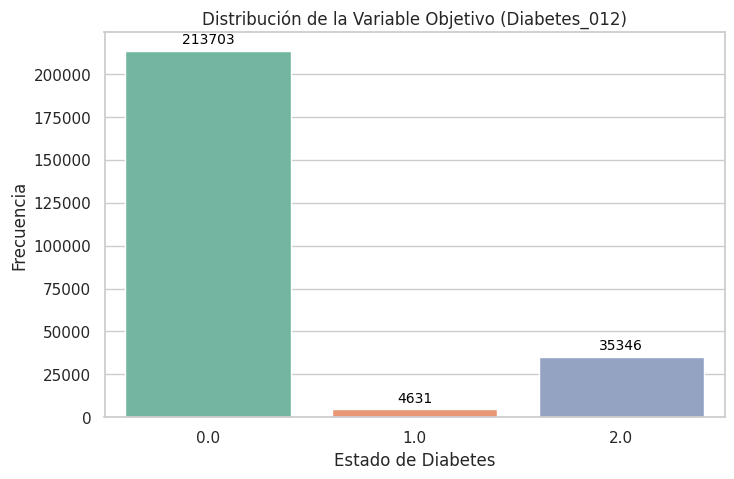

In [176]:
# Gráfico de barras para la variable objetivo
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Diabetes_012', data=df, hue='Diabetes_012', palette='Set2', legend=False)  # Definir ax
plt.title('Distribución de la Variable Objetivo (Diabetes_012)')
plt.xlabel('Estado de Diabetes')
plt.ylabel('Frecuencia')

# Agregar valores numéricos encima de las barras
for p in ax.patches:  # Referenciar ax.patches
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


Se puede notar que hay un gran desbalance de clases, esto puede llegar a ser un problema al futuro cuando se desee realizar modelos de machine learning, debido al overfitting. Llegado el momento habrá que utilizar algún metodo de regularización para el balance de clases

Se plantea un analisis con una **matriz de correlación de Pearso**n, para explorar de forma global estos datos, sin embargo hay que tener en cuenta que este analisis lineal entre variables que en algunos casos no es el más adecuado.

Los valores del Coeficiente de Correlación de Pearson son los siguientes

- +1: Correlación positiva perfecta (aumenta una variable, aumenta la otra).
- -1: Correlación negativa perfecta (aumenta una variable, disminuye la otra).
- 0: No hay correlación lineal.

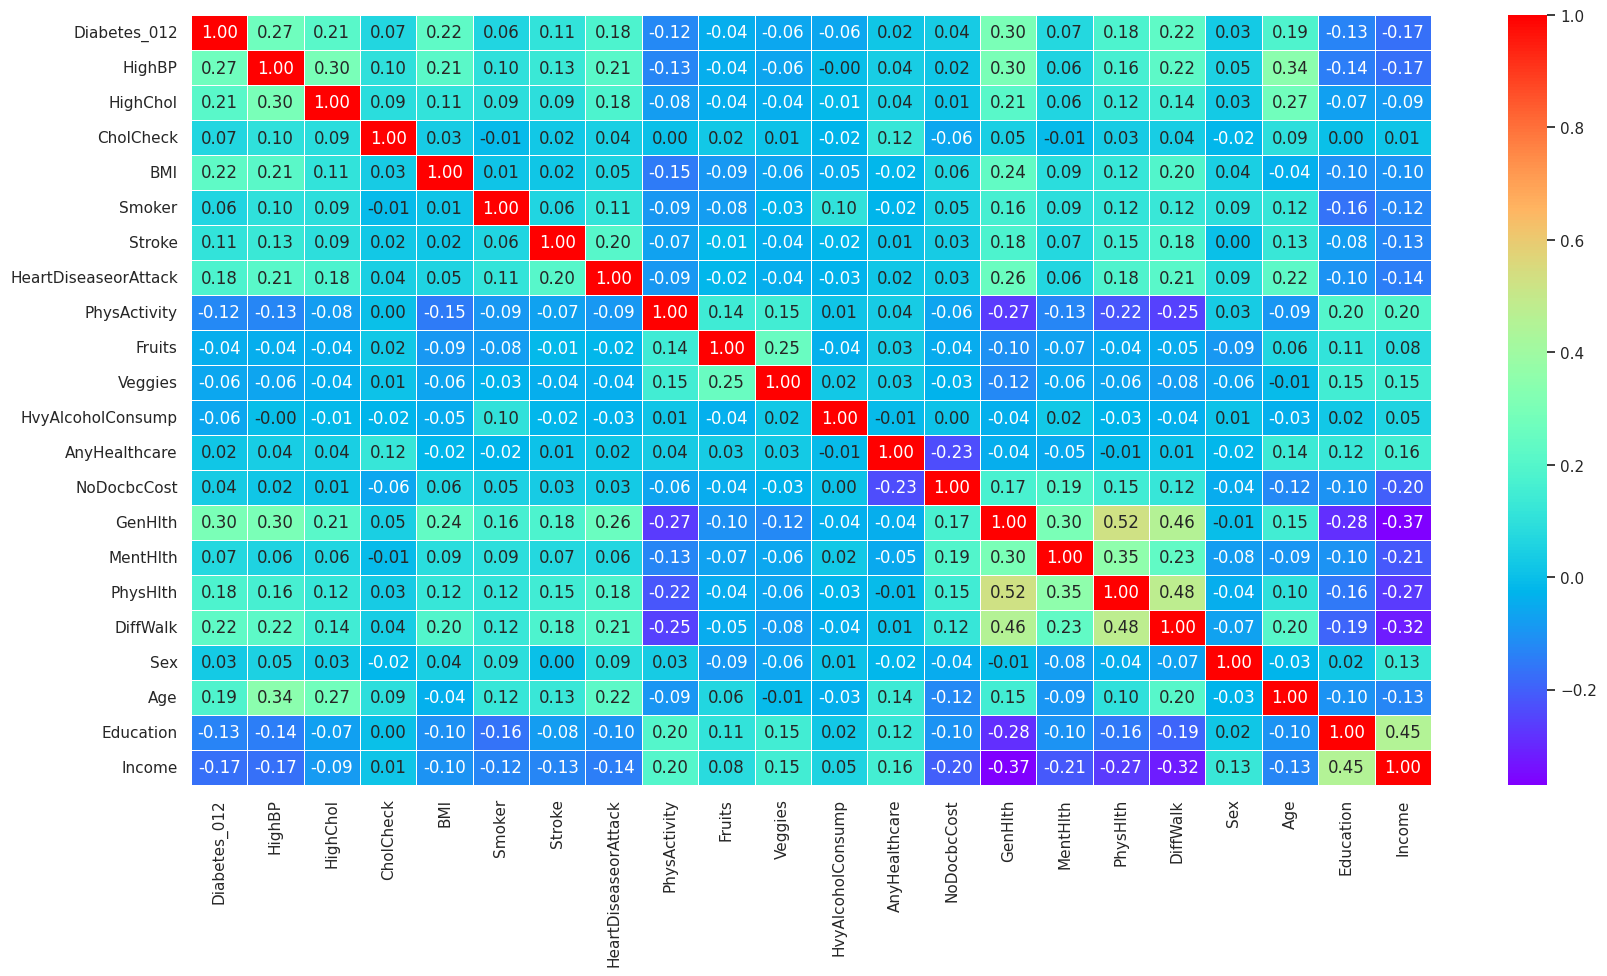

In [177]:
# Grafica de correlacion
# paleta de colores para graficar la matriz Espectrograma 'PiYG', 'plasma', 'magma','inferno',' viridis', 'hot', 'jet', 'rainbow', 'nipy_spectralr' , 'muted'
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f', ax=ax, cmap='rainbow')
plt.show()


##### Hipótesis
De manera general, se puede plantear lo siguiente:

- **Hipótesis 1:** Un nivel elevado de presión arterial se relaciona con un mayor riesgo de padecer diabetes.

- **Hipótesis 2:** Ser fumador incrementa el riesgo de padecer diabetes

- **Hipótesis 3:** Un mayor consumo de frutas y verduras está relacionado con una disminución en el riesgo de padecer diabetes.

- **Hipótesis 4:** Un índice de masa corporal elevado (BMI) se asocia con un mayor riesgo de desarrollar diabetes. A su vez, un BMI elevado está vinculado a una menor ingesta de frutas y verduras, así como a niveles más bajos de educación e ingresos.

- **Hipótesis 5:** El riesgo de padecer diabetes tiende a incrementarse con la edad.

- **Hipótesis 6:** A medida que aumenta el nivel de educación recibido, disminuye el riesgo de padecer diabetes. Además, un mayor nivel educativo está asociado a un aumento en los ingresos.



###### **Hipótesis 1:** Presión arterial vs Diabetes

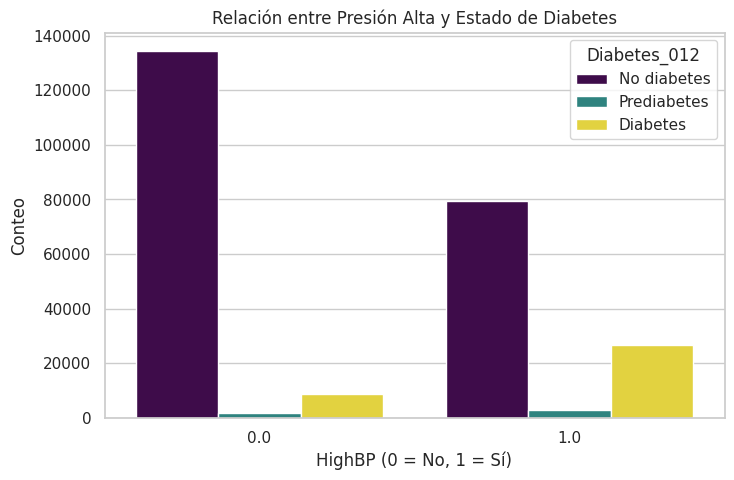

In [178]:
# Gráfico de barras: HighBP vs Diabetes_012
plt.figure(figsize=(8, 5))
sns.countplot(x='HighBP', hue='Diabetes_012', data=df, palette='viridis')
plt.title('Relación entre Presión Alta y Estado de Diabetes')
plt.xlabel('HighBP (0 = No, 1 = Sí)')
plt.ylabel('Conteo')
plt.legend(title='Diabetes_012', loc='upper right', labels=['No diabetes', 'Prediabetes', 'Diabetes'])
plt.show()


Se puede observar que aquellos individuos que poseen un nivel alto de presión arterial, son aquellos más propensos a tener diabetes o prediabetes. Sin embargo se obsrva una gran cantidad de sujetos sin diabetes tanto para el caso de no poseer alta presion arterial como teniendo presion arterial alta, esto se debe a lo visto anteriormente, es decir, a ese desbalance de clases mencionado.



In [179]:
import pandas as pd

# Contar el número de elementos de cada clase
class_counts = df['Diabetes_012'].value_counts()

# Determinar el número de elementos que debe tener cada clase (el mínimo número de clases)
min_class_count = class_counts.min()

# Crear un nuevo DataFrame con igual número de elementos por clase
balanced_df = pd.concat([
    df[df['Diabetes_012'] == label].sample(min_class_count, random_state=42)
    for label in class_counts.index
])

# Verificar el nuevo balance de clases
print(balanced_df['Diabetes_012'].value_counts())



Diabetes_012
0.0    4631
2.0    4631
1.0    4631
Name: count, dtype: int64


In [180]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13893 entries, 162288 to 41994
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          13893 non-null  float64
 1   HighBP                13893 non-null  float64
 2   HighChol              13893 non-null  float64
 3   CholCheck             13893 non-null  float64
 4   BMI                   13893 non-null  float64
 5   Smoker                13893 non-null  float64
 6   Stroke                13893 non-null  float64
 7   HeartDiseaseorAttack  13893 non-null  float64
 8   PhysActivity          13893 non-null  float64
 9   Fruits                13893 non-null  float64
 10  Veggies               13893 non-null  float64
 11  HvyAlcoholConsump     13893 non-null  float64
 12  AnyHealthcare         13893 non-null  float64
 13  NoDocbcCost           13893 non-null  float64
 14  GenHlth               13893 non-null  float64
 15  MentHlth           

Se realiza un balance de clases unicamente con fines didacticos para poder analizar los distintos parámetros de una forma más clara, ya que esta gran diferencia entre los datos complica la visualización del comportamiento de los mismos

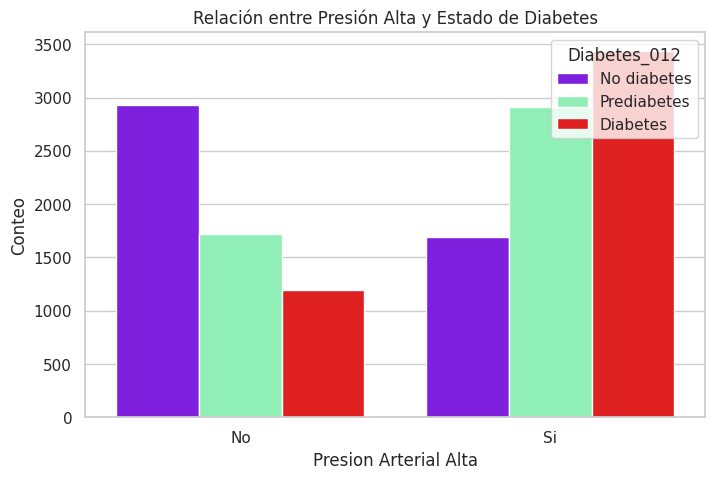

In [181]:
# Gráfico de barras: HighBP vs Diabetes_012
plt.figure(figsize=(8, 5))

# Mapeo para presion arterial alta
highbp_mapping = {
    0: 'No',
    1: 'Si',
}

balanced_df['HighBP'] = balanced_df['HighBP'].replace(highbp_mapping)

sns.countplot(x='HighBP', hue='Diabetes_012', data=balanced_df, palette='rainbow')
plt.title('Relación entre Presión Alta y Estado de Diabetes')
plt.xlabel('Presion Arterial Alta')
plt.ylabel('Conteo')
plt.legend(title='Diabetes_012', loc='upper right', labels=['No diabetes', 'Prediabetes', 'Diabetes'])
plt.show()


Ya con el dataset "balanceado" se puede observar este efecto que se mencionó anteriormente pero de una forma mucho más clara


###### **Hipótesis 2:** Fumador vs Diabetes

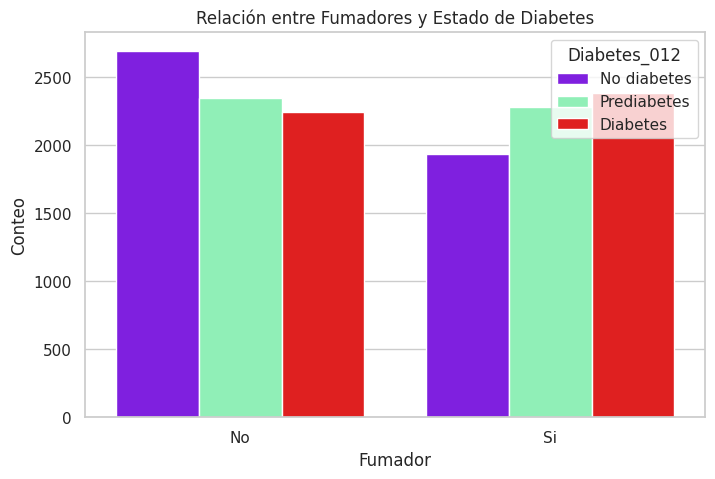

In [182]:
# Gráfico de barras: Smoker vs Diabetes_012
plt.figure(figsize=(8, 5))

# Mapeo para fumadores
smoker_mapping = {
    0: 'No',
    1: 'Si',
}

balanced_df['Smoker'] = balanced_df['Smoker'].replace(smoker_mapping)

sns.countplot(x='Smoker', hue='Diabetes_012', data=balanced_df, palette='rainbow')
plt.title('Relación entre Fumadores y Estado de Diabetes')
plt.xlabel('Fumador')
plt.ylabel('Conteo')
plt.legend(title='Diabetes_012', loc='upper right', labels=['No diabetes', 'Prediabetes', 'Diabetes'])
plt.show()


Se observa que los pacientes fumadores son aquellos que tienen una tendencia mayor a ser diabeticos


In [242]:
tabla_resumen = df.groupby('Diabetes_012')[['Smoker', 'BMI']].agg(['mean', 'std']).reset_index()
tabla_resumen

Diabetes_012    Smoker                  BMI          
                    mean       std       mean       std
0          0.0  0.430189  0.495106  27.092010  4.785054
1          1.0  0.488370  0.483046  29.554800  5.033845
2          2.0  0.522030  0.499522  30.284093  5.036387

###### **Hipótesis 3:** Frutas vs Diabetes

Solo realicé el análisis de frutas vs diabetes, el de verduras no lo consideré

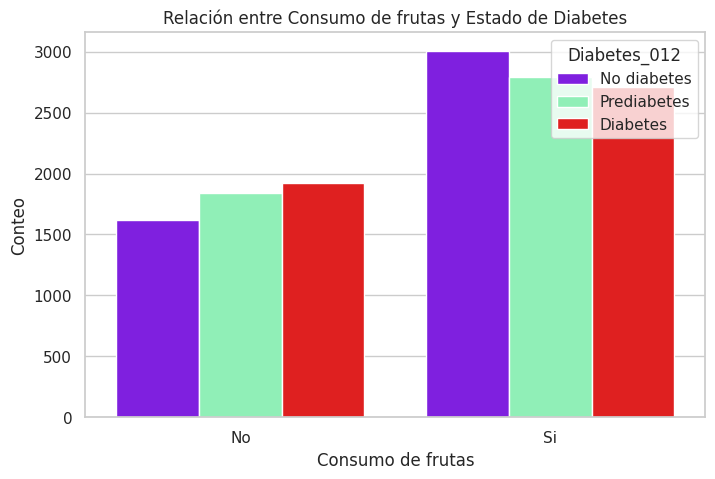

In [183]:
# Gráfico de barras: Fruits vs Diabetes_012
plt.figure(figsize=(8, 5))

# Mapeo para frutas
fruits_mapping = {
    0: 'No',
    1: 'Si',
}

balanced_df['Fruits'] = balanced_df['Fruits'].replace(fruits_mapping)

sns.countplot(x='Fruits', hue='Diabetes_012', data=balanced_df, palette='rainbow')
plt.title('Relación entre Consumo de frutas y Estado de Diabetes')
plt.xlabel('Consumo de frutas')
plt.ylabel('Conteo')
plt.legend(title='Diabetes_012', loc='upper right', labels=['No diabetes', 'Prediabetes', 'Diabetes'])
plt.show()


Se puede ver como una dieta saludable, en este caso la incorporación del consumo de frutas puede ayudar a reducir el riesgo de padecer diabetes

###### **Hipótesis 4:** BMI vs Diabetes

<ipython-input-184-31a923c9fbf5>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Estado de Diabetes', loc='upper left')


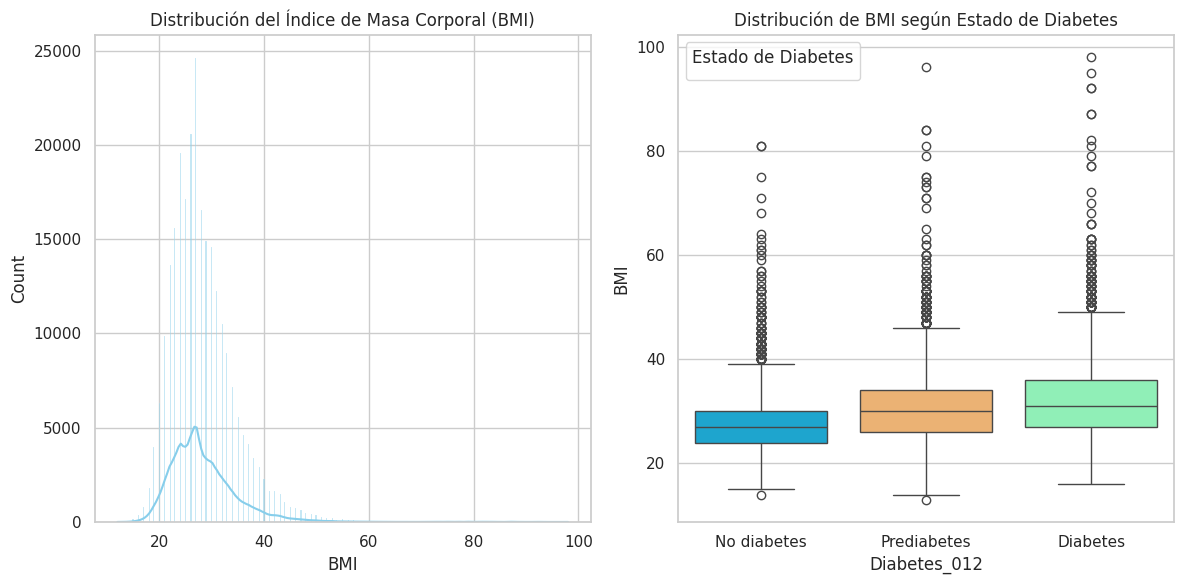

In [184]:
plt.figure(figsize=(12, 6))

# Mapeo para diabetes
diabetes_mapping = {
    0: 'No diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
}

balanced_df['Diabetes_012'] = balanced_df['Diabetes_012'].replace(diabetes_mapping)

# Histograma de BMI
plt.subplot(1, 2, 1)
sns.histplot(df['BMI'], kde=True, color='skyblue')
plt.title('Distribución del Índice de Masa Corporal (BMI)')

# Boxplot de BMI por Diabetes_012 con orden personalizado
plt.subplot(1, 2, 2)
sns.boxplot(
    x='Diabetes_012',
    y='BMI',
    data=balanced_df,
    hue='Diabetes_012',
    palette='rainbow',
    order=['No diabetes', 'Prediabetes', 'Diabetes']  # Orden explícito
)
plt.title('Distribución de BMI según Estado de Diabetes')
plt.legend(title='Estado de Diabetes', loc='upper left')

plt.tight_layout()
plt.show()


Se puede ver que la mayor cantidad de valores se concentra entre 20 y 40.

Se pueden observar bastantes outliers, esto tiene sentido ya que viendo valores normales dados por la Organización Mundial de la Salud, se tienen los valores que se presentan en la tabla.

Estos Outliers luego hay que filtrarlos al momento de realizar los modelos de predicción

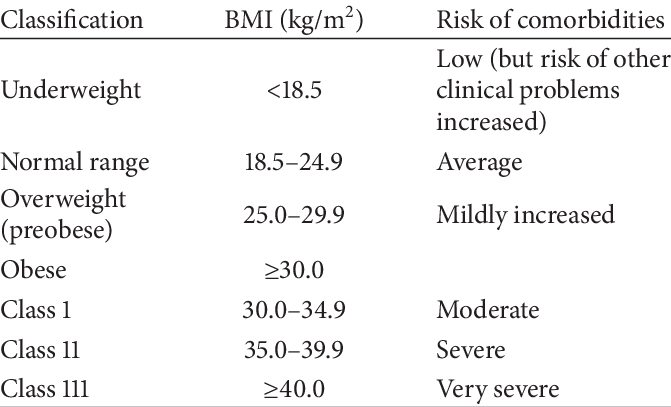

###### **Hipótesis 5:** Edad vs Diabetes

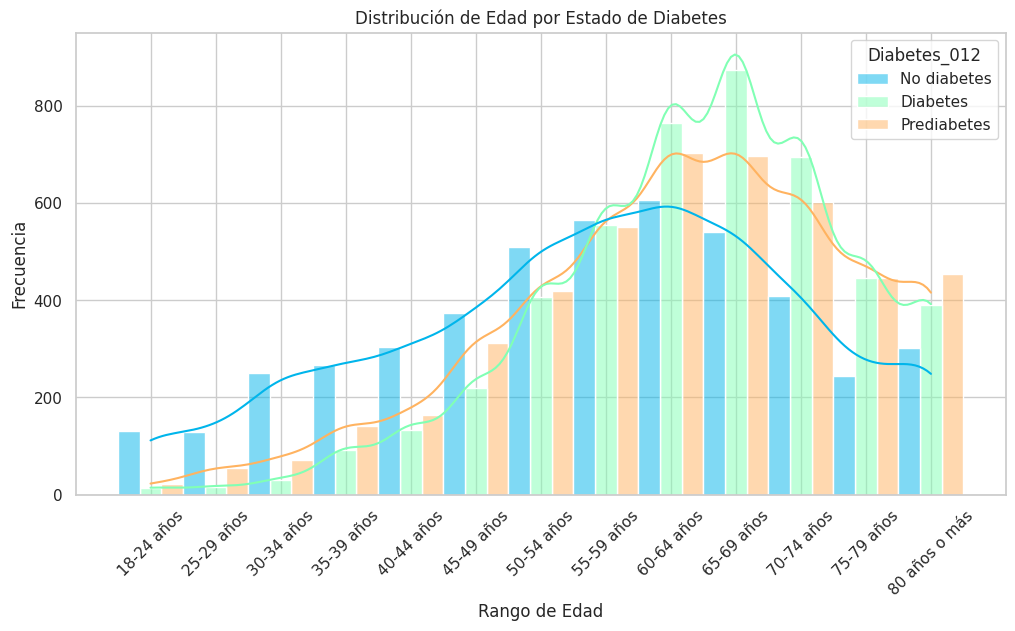

In [185]:
# Mapeo para la edad
age_mapping = {
    1: '18-24 años', 2: '25-29 años', 3: '30-34 años', 4: '35-39 años', 5: '40-44 años', 6: '45-49 años', 7: '50-54 años', 8: '55-59 años',
    9: '60-64 años', 10: '65-69 años', 11: '70-74 años', 12: '75-79 años', 13: '80 años o más'
}

# Mapeo para diabetes
diabetes_mapping = {
    0: 'No diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
}

# Reemplazo de valores en el DataFrame
balanced_df['Age'] = balanced_df['Age'].replace(age_mapping)
balanced_df['Diabetes_012'] = balanced_df['Diabetes_012'].replace(diabetes_mapping)

# Ordenar las categorías de la columna 'Age'
age_order = [
    '18-24 años', '25-29 años', '30-34 años', '35-39 años', '40-44 años', '45-49 años',
    '50-54 años', '55-59 años', '60-64 años', '65-69 años', '70-74 años', '75-79 años', '80 años o más'
]
balanced_df['Age'] = pd.Categorical(balanced_df['Age'], categories=age_order, ordered=True)

# Histograma para Edad por Estado de Diabetes
plt.figure(figsize=(12, 6))

# Histogramas separados
sns.histplot(data=balanced_df, x='Age', hue='Diabetes_012', multiple='dodge', palette='rainbow', kde=True)
plt.title('Distribución de Edad por Estado de Diabetes')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.show()


Se observa como el riesgo de padecer diabetes o prediabetes aumenta con la edad, alcanzando su pico maximo en el rango 10, el cual se corresponde con un rango etareo de 65 a 69 años


Interesa ver si hay una relación entre la edad el bmi y el padecimiento de diabetes

In [244]:
tabla_resumen = df.groupby('Diabetes_012')[['Age', 'BMI', 'HighBP']].agg(['mean', 'std']).reset_index()
tabla_resumen

Diabetes_012       Age                  BMI              HighBP          
                    mean       std       mean       std      mean       std
0          0.0  7.812896  3.110448  27.092010  4.785054  0.364105  0.481182
1          1.0  9.174019  2.578795  29.554800  5.033845  0.625648  0.467797
2          2.0  9.498796  2.306185  30.284093  5.036387  0.744739  0.436015

Se puede ver que la edad media aumenta en aquellos pacientes que padecen diabetes o prediabetes, además se puede notar que el indice de masa corporal también aumenta en simultáneo.


###### **Hipótesis 6:** Nivel educativo vs Diabetes

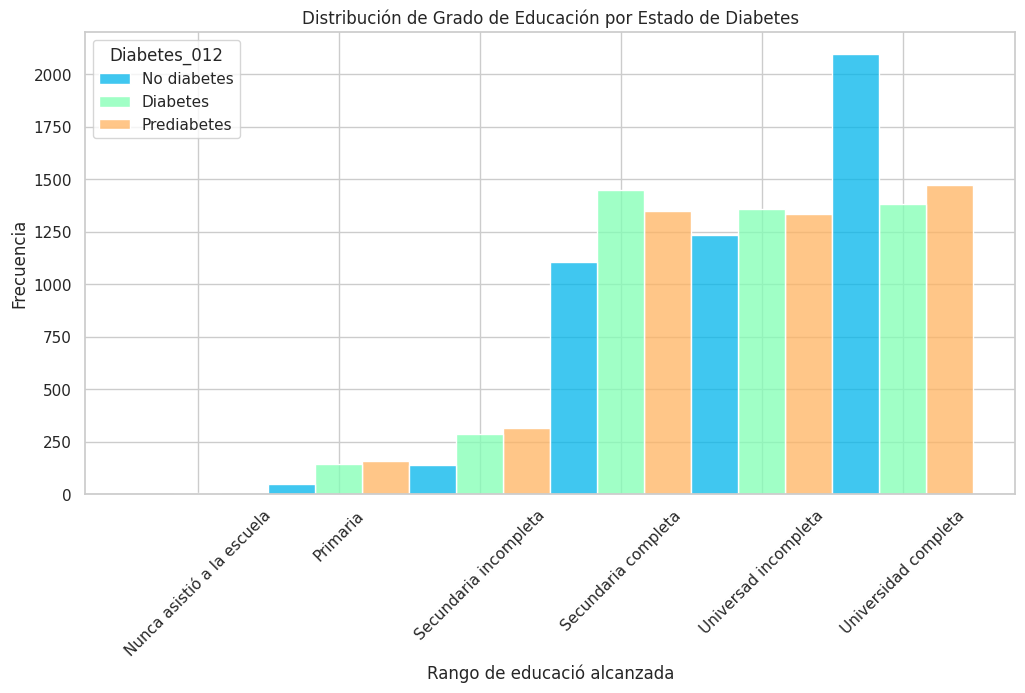

In [186]:
# Mapeo para la eduación
edu_mapping = {
    1: 'Nunca asistió a la escuela', 2: 'Primaria', 3: 'Secundaria incompleta', 4: 'Secundaria completa', 5: 'Universad incompleta', 6: 'Universidad completa'
}

# Mapeo para diabetes
diabetes_mapping = {
    0: 'No diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
}

# Reemplazo de valores en el DataFrame
balanced_df['Education'] = balanced_df['Education'].replace(edu_mapping)
balanced_df['Diabetes_012'] = balanced_df['Diabetes_012'].replace(diabetes_mapping)

# Ordenar las categorías de la columna 'Age'
edu_order = [
'Nunca asistió a la escuela', 'Primaria', 'Secundaria incompleta', 'Secundaria completa', 'Universad incompleta', 'Universidad completa'
]
balanced_df['Education'] = pd.Categorical(balanced_df['Education'], categories=edu_order, ordered=True)

# Histograma para Edad por Estado de Diabetes
plt.figure(figsize=(12, 6))

# Histogramas separados
sns.histplot(data=balanced_df, x='Education', hue='Diabetes_012', multiple='dodge', palette='rainbow')
plt.title('Distribución de Grado de Educación por Estado de Diabetes')
plt.xlabel('Rango de educació alcanzada')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad
plt.show()


Se puede notar que hay una cierta relación entre el nivel de educación y el padecimiento de diabetes, si bien no es una variable fuertemente relacionada, es interesante notar que aquellas personas que tienen la ubniversidad completa, son aquellas que menor riesgo de padecer estados de diabetes

### Preprocesamiento de datos

En esta sección, realizamos tareas de limpieza y preparación de datos para que estén listos para la construcción de modelos.

- Manejo de Valores Faltantes: Identificar y tratar los valores faltantes en las columnas relevantes.
- Codificación de Variables Categóricas: Convertir variables categóricas en formato numérico (por ejemplo, one-hot encoding).
- Normalización/Estandarización: Realizar normalización o estandarización si es necesario.
- Selección de Características: Seleccionar las características más relevantes si es necesario.

#### Outliers

Debido a lo visto en la exploración de datos, la única variable que presenta outliers, es decir valores atipicos que se salen del rango de valores esperados, es el indice de masa corporal. Es por esto que únicamente aplicaremos el cirerio del rango intercuartilico para esta variable

In [187]:
# Cantidad de filas antes de eliminar outliers
filas_antes = len(df)

# Calcular Q1, Q3 y el IQR para BMI
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame sin los outliers de BMI
df = df[(df['BMI'] >= limite_inferior) & (df['BMI'] <= limite_superior)]

# Cantidad de filas después de eliminar outliers
filas_despues = len(df)

# Calcular cantidad de outliers eliminados
outliers_eliminados = filas_antes - filas_despues

print(f'Se eliminaron {outliers_eliminados} outliers de BMI.')


Se eliminaron 9847 outliers de BMI.


Observemos como estan distribuidas las clases, una vez que hemos eliminado estos outliers

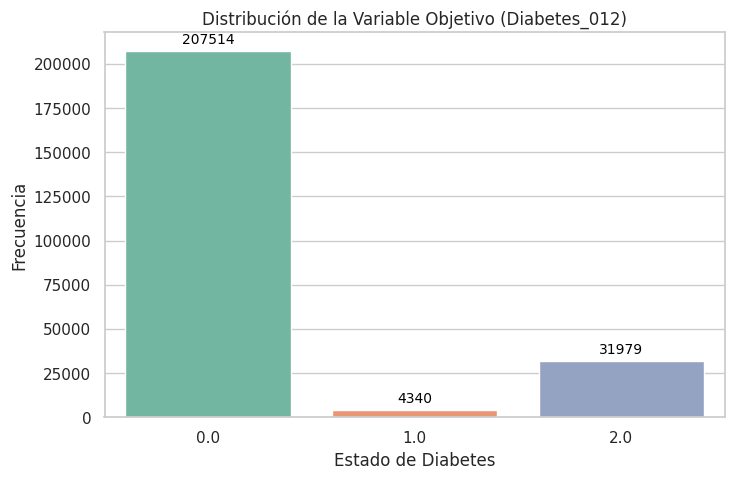

In [188]:
# Gráfico de barras para la variable objetivo
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Diabetes_012', data=df, hue='Diabetes_012', palette='Set2', legend=False)  # Definir ax
plt.title('Distribución de la Variable Objetivo (Diabetes_012)')
plt.xlabel('Estado de Diabetes')
plt.ylabel('Frecuencia')

# Agregar valores numéricos encima de las barras
for p in ax.patches:  # Referenciar ax.patches
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


#### Técnicas de regularización para el desbalance de clases

Las técnicas de regularización del desbalance de clases buscan equilibrar la cantidad de muestras en cada categoría para evitar sesgos en el modelo.

- **Oversampling** (Aumentar la clase minoritaria)
  - Duplica datos o genera muestras sintéticas (data augmentation)
  - Se usa cuando hay pocos datos y la clase minoritaria es ignorada.

- **Undersampling** (Reducir la clase mayoritaria)

  - Elimina datos de la clase mayoritaria (aleatoriamente o con métodos como NearMiss).

  - Se usa cuando hay muchos datos y se quiere reducir el costo computacional.

In [189]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Separar características (X) y variable objetivo (y)
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

# 1. Oversampling de la clase 1 (diabetes valor 1) en un 40%
oversample = SMOTE(sampling_strategy={1: int(len(df[df['Diabetes_012'] == 1]) * 1.4), 2: len(df[df['Diabetes_012'] == 2])})
X_over, y_over = oversample.fit_resample(X, y)

# 2. Undersampling de la clase 0 (diabetes valor 0) en un 70%
undersample = RandomUnderSampler(sampling_strategy={0: int(len(df[df['Diabetes_012'] == 0]) * 0.3)})
X_resampled, y_resampled = undersample.fit_resample(X_over, y_over)

# Mostrar nueva distribución de clases
print("Distribución después de balanceo:", Counter(y_resampled))

# Guardar el dataset balanceado en un archivo CSV
df_resampled = X_resampled.copy()
df_resampled['Diabetes_012'] = y_resampled


Distribución después de balanceo: Counter({0.0: 62254, 2.0: 31979, 1.0: 6076})


Si bien las clases siguen desbalanceadas, con esto se puede mitigar un poco el overfitting que se podría llegar a producir, sin embargo hay que tener cuidado con la clase a la cual se le realizó oversampling, ya que se aumento un 40%, lo cual también puede llegar a producir overfitting, es cuestión de revisar el modelo cuanddo se haga

In [190]:
df_resampled.describe().T


,count,mean,std,min,25%,50%,75%,max
HighBP,100309.0,0.501295,0.499066,0.0,0.0,0.727561,1.0,1.0
HighChol,100309.0,0.486674,0.498844,0.0,0.0,0.000000,1.0,1.0
CholCheck,100309.0,0.970777,0.168250,0.0,1.0,1.000000,1.0,1.0
BMI,100309.0,28.258840,5.107399,14.0,24.0,28.000000,32.0,41.0
Smoker,100309.0,0.462993,0.497624,0.0,0.0,0.000000,1.0,1.0
Stroke,100309.0,0.052776,0.223079,0.0,0.0,0.000000,0.0,1.0
HeartDiseaseorAttack,100309.0,0.125037,0.329921,0.0,0.0,0.000000,0.0,1.0
PhysActivity,100309.0,0.733491,0.441129,0.0,0.0,1.000000,1.0,1.0
Fruits,100309.0,0.625396,0.482995,0.0,0.0,1.000000,1.0,1.0
Veggies,100309.0,0.799504,0.399385,0.0,1.0,1.000000,1.0,1.0


#### Encoding y Normalizado

Debido a que en el dataset todas las variables ya se encontraban discretizadas y asociadas a un numero, no es necesario realizar one hote encoding ni tampoco label encoding.

En este caso tampoco considero necesario una normalización debiido a que el valor maximo que se puede observar es 41, lo cual es dentro de todo pequeño

### Construcción de modelos

Debido a que el objetivo es clasificar si un paciente puede padecer diabetes, prediabetes o no. Utilizaré clasificadores, es por esto que para validar el modelo se usaran las métricas que derivan de la matriz de confusión.

In [191]:
df = df_resampled #Para facilitar la escritura del codigo

In [192]:
semilla = 142857

In [231]:
# Creo DF para ir guardando los resultados
column_names = ["Modelo","Tiempo", "Accuracy", "F1_0", "F1_1", "F1_2", "Precision_0", "Precision_1", "Precision_2",
                "Recall_0", "Recall_1", "Recall_2"]
resultados_df = pd.DataFrame(columns=column_names)


In [206]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report
    import numpy as np

    # Calcular las métricas principales
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Calcular el reporte de clasificación (sin matriz de confusión)
    report = classification_report(y_test, y_pred, output_dict=True)  # Devuelve el reporte en formato diccionario

    # Extraer las métricas individuales (accuracy, f1, precision, recall)
    accuracy = report['accuracy']
    f1_0 = report['0.0']['f1-score']
    f1_1 = report['1.0']['f1-score']
    f1_2 = report['2.0']['f1-score']
    precision_0 = report['0.0']['precision']
    precision_1 = report['1.0']['precision']
    precision_2 = report['2.0']['precision']
    recall_0 = report['0.0']['recall']
    recall_1 = report['1.0']['recall']
    recall_2 = report['2.0']['recall']

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'Tiempo': [tiempo_ejecucion],
        'Accuracy': [accuracy],
        'F1_0': [f1_0],
        'F1_1': [f1_1],
        'F1_2': [f1_2],
        'Precision_0': [precision_0],
        'Precision_1': [precision_1],
        'Precision_2': [precision_2],
        'Recall_0': [recall_0],
        'Recall_1': [recall_1],
        'Recall_2': [recall_2]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    # Eliminar columnas vacías o todas NA
    resultados_df = resultados_df.dropna(axis=1, how='all')

    return resultados_df


In [207]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")


In [208]:
# X será todo menos la columna 'Diabetes_012' (target)
X = df.drop(columns=['Diabetes_012'])

# y será la columna 'Diabetes_012' (target)
y = df['Diabetes_012']

# Realizamos el split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (70216, 21)
Tamaño de X_test: (30093, 21)
Tamaño de y_train: (70216,)
Tamaño de y_test: (30093,)


#### Regresión logistica multinomial

In [232]:
modelo = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42) # Se selecciona ese solver porque es el recomendado para conjuntos de datos medianos

In [233]:
entrenar_modelo(modelo, 'Logistic Regression', X_train, y_train, X_test, y_test)

Resultados para el modelo: Logistic Regression
                Modelo     Tiempo  Accuracy      F1_0  F1_1      F1_2  \
0  Logistic Regression  16.996027  0.714984  0.803967   0.0  0.593659   

   Precision_0  Precision_1  Precision_2  Recall_0  Recall_1  Recall_2  
0     0.755735          0.0     0.618053  0.858775       0.0  0.571117   



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-207-bd280cf150ad>:20: FutureWarnin

#### Arboles de decision

In [234]:
modelo = DecisionTreeClassifier(random_state = semilla)

In [235]:
entrenar_modelo(modelo, 'Arbol de decisión', X_train, y_train, X_test, y_test)

Resultados para el modelo: Arbol de decisión
              Modelo   Tiempo  Accuracy      F1_0      F1_1      F1_2  \
0  Arbol de decisión  0.36962  0.624796  0.729395  0.291677  0.491024   

   Precision_0  Precision_1  Precision_2  Recall_0  Recall_1  Recall_2  
0      0.73307     0.267651     0.495458  0.725756  0.320442  0.486669   



#### Gradient Boosting

In [236]:
modelo = xgb.XGBClassifier(eval_metric='mlogloss', random_state= semilla) #Se selecciona mlogloss porque es un parametro que se utiliza para multiclase

In [237]:
entrenar_modelo(modelo, 'Gradient Boosting', X_train, y_train, X_test, y_test)

Resultados para el modelo: Gradient Boosting
              Modelo    Tiempo  Accuracy      F1_0      F1_1     F1_2  \
0  Gradient Boosting  3.143476   0.73429  0.809343  0.445778  0.61558   

   Precision_0  Precision_1  Precision_2  Recall_0  Recall_1  Recall_2  
0     0.776808     0.994264     0.626936  0.844722  0.287293  0.604627   



### Conclusiones

In [238]:
resultados_df

,Modelo,Tiempo,Accuracy,F1_0,F1_1,F1_2,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2
0,Logistic Regression,16.996027,0.714984,0.803967,0.000000,0.593659,0.755735,0.000000,0.618053,0.858775,0.000000,0.571117
1,Arbol de decisión,0.369620,0.624796,0.729395,0.291677,0.491024,0.733070,0.267651,0.495458,0.725756,0.320442,0.486669
2,Gradient Boosting,3.143476,0.734290,0.809343,0.445778,0.615580,0.776808,0.994264,0.626936,0.844722,0.287293,0.604627


#### **Regresión logistica multinomial**

**Positivo:**

- **Accuracy: 71.5%:** Desempeño decente en términos de precisión general.

- **Precision_0 (Clase 0) 0.756:** El modelo tiene una buena capacidad para identificar correctamente las instancias de la clase 0 (no diabetes).

- **Recall_0 0.859:** El modelo tiene una alta capacidad para identificar correctamente los casos negativos (no diabéticos).

**Negativo:**

- **F1_1 (Clase 1) 0.0:** : Es muy bajo y El modelo no está identificando bien la clase 1 (pre diabetes).

- **Precision_1 y Recall_1:** Ambos son 0.0, lo que indica que no hay predicciones correctas para esta clase.

#### **Árbol de Decisión**

**Positivo:**

- **Accuracy 62.5%:** Es decente, aunque inferior al modelo de regresión logística y al de Gradient Boosting.

- **F1_1 0.729:** El modelo tiene un buen desempeño en la clase 0.

- **Recall_0 y Precision_0:** Ambos son altos, lo que sugiere que el modelo está identificando correctamente la clase 0.

**Negativo:**

- **F1_1 0.292:** El modelo no está identificando bien la clase 1.

- **F1_2 0.491:** El modelo también tiene problemas con la clase 2, aunque en menor medida que con la clase 1.

#### **Gradient Boosting**
**Positivo:**

- **Accuracy 73.4%:** Es el mejor de los tres modelos.

- **F1_0 0.80:** Buen desempeño para la clase 0.

- **F1_1 0.446:** Aunque aún es bajo, es mucho mejor que los otros dos modelos.

- **Precision_1 0.994:** Buena capacidad para identificar las instancias de la clase 1 (prediabetes)

- **Recall_0 y Recall_2 0.845 y 0.605 respectivamente:** Muestra que el modelo tiene una buena capacidad para identificar tanto la clase 0 como la clase 2.

**Negativo:**

- **Recall_1 0.287:** Es bajo, esto sugiere que aunque la precisión es alta para la clase 1, el modelo no está identificando bien todos los casos de la clase 1.

### Resumen

Los tres modelos muestran dentro de todo un buen rendimiento en la clasificación para la clase 0, es decir, no padece diabetes. Sin embargo, todos los modelos tienen dificultades para la clasificación de la clase 1 y en menor medida en algunos casos para clasificar la clase 2.

Si bien Gradient Boosting es el modelo con mayor capacidad de generalización de los 3, no se puede considerar como un modelo fiables, debido a las dificultades mencionadas anteriormente, es por esto que a priori no se puede predecir el padecimiento de la diabetes para sujetos.

Como pasos a seguir se podría incrementar la base de datos para evitar hacer la data augmentation, cambiar hiperparametros de algunos modelos o utilizar alguno mas complejo